## Purpose of analysis:
* Build moving average of varios stocks 
* Determine correlations between stock returns 
* Create an optimal portfolio
* Try to predict the future behavior of the stocks 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

In [2]:
# Setting the begining and ending
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

In [3]:
# Four company for data extraction
company_list = ['TWTR', 'TSLA', 'MSFT', 'AMZN']

In [4]:
#globals()- taking the string and makes it a global variable
for company in company_list:
    globals()[company] = data.DataReader(company, 'yahoo', year_ago, today)

In [5]:
TWTR.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,74.330002,66.190002,68.449997,73.169998,32669500,73.169998
2021-02-24,73.949997,71.709999,73.099998,71.919998,18309900,71.919998
2021-02-25,80.750000,73.889999,78.150002,74.589996,63625700,74.589996
2021-02-26,79.080002,75.000000,76.870003,77.059998,35323500,77.059998
2021-03-01,78.730003,76.050003,78.360001,77.629997,24359200,77.629997


In [6]:
TSLA.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,713.609985,619.000000,662.130005,698.840027,66606900,698.840027
2021-02-24,745.000000,694.169983,711.849976,742.020020,36767000,742.020020
2021-02-25,737.210022,670.580017,726.150024,682.219971,39023900,682.219971
2021-02-26,706.700012,659.510010,700.000000,675.500000,41089200,675.500000
2021-03-01,719.000000,685.049988,690.109985,718.429993,27136200,718.429993


In [7]:
MSFT.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,234.830002,228.729996,230.330002,233.270004,30228700.0,231.385269
2021-02-24,235.199997,229.000000,230.009995,234.550003,26339700.0,232.654938
2021-02-25,234.589996,227.880005,232.080002,228.990005,39542200.0,227.139847
2021-02-26,235.369995,229.539993,231.529999,232.380005,37819200.0,230.502472
2021-03-01,237.470001,233.149994,235.899994,236.940002,25324000.0,235.025620


In [8]:
AMZN.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,3204.729980,3093.600098,3127.030029,3194.500000,4677200,3194.500000
2021-02-24,3171.229980,3125.379883,3166.750000,3159.530029,3011300,3159.530029
2021-02-25,3178.260010,3047.760010,3136.739990,3057.159912,4533800,3057.159912
2021-02-26,3122.439941,3036.699951,3095.199951,3092.929932,4275900,3092.929932
2021-03-01,3149.560059,3097.989990,3127.889893,3146.139893,2729100,3146.139893


In [9]:
TWTR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-02-23 to 2022-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    int64  
 5   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


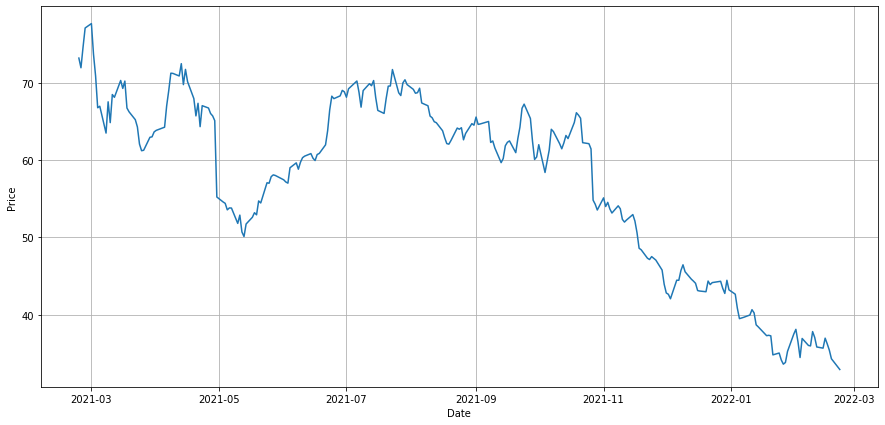

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(TWTR['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Date'>

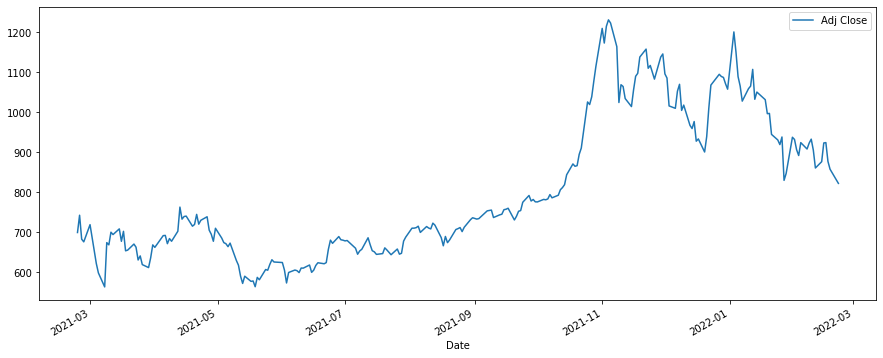

In [11]:
TSLA['Adj Close'].plot(legend=True, figsize=(15, 6))

## Moving average

Moving average - function whose value at each point is equal to some average value of the original function for the previous period. 

Formula for calculations:

SUM = sum of prices for past x days; MA = SUM / x 

In [12]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    TWTR[ma_str] = TWTR['Adj Close'].rolling(ma).mean()
    TSLA[ma_str] = TSLA['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()

In [13]:
TWTR.head()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30
Date,,,,,,,,,
2021-02-23,74.330002,66.190002,68.449997,73.169998,32669500,73.169998,NaN,NaN,NaN
2021-02-24,73.949997,71.709999,73.099998,71.919998,18309900,71.919998,NaN,NaN,NaN
2021-02-25,80.750000,73.889999,78.150002,74.589996,63625700,74.589996,NaN,NaN,NaN
2021-02-26,79.080002,75.000000,76.870003,77.059998,35323500,77.059998,NaN,NaN,NaN
2021-03-01,78.730003,76.050003,78.360001,77.629997,24359200,77.629997,NaN,NaN,NaN


In [14]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

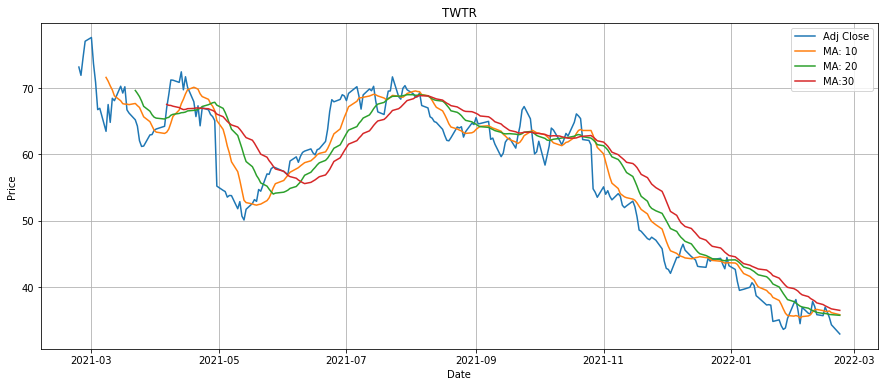

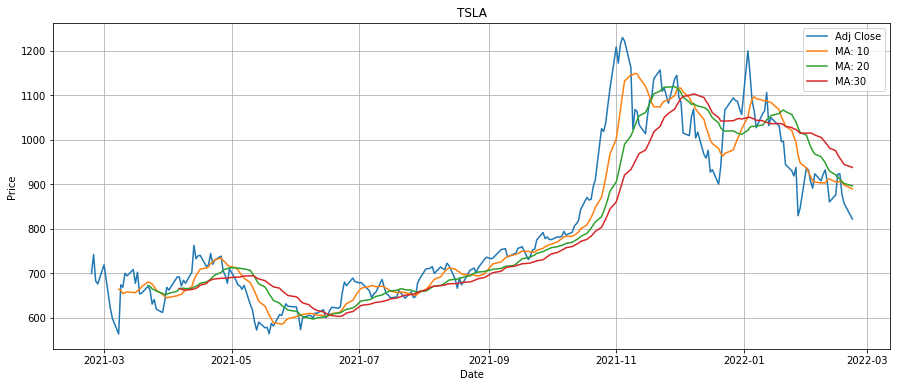

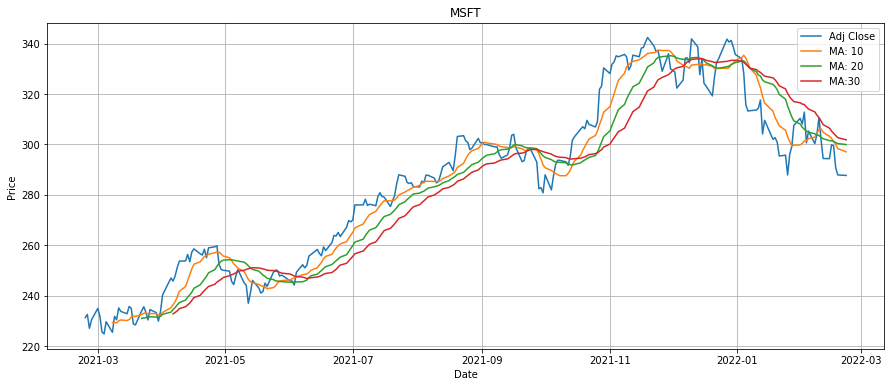

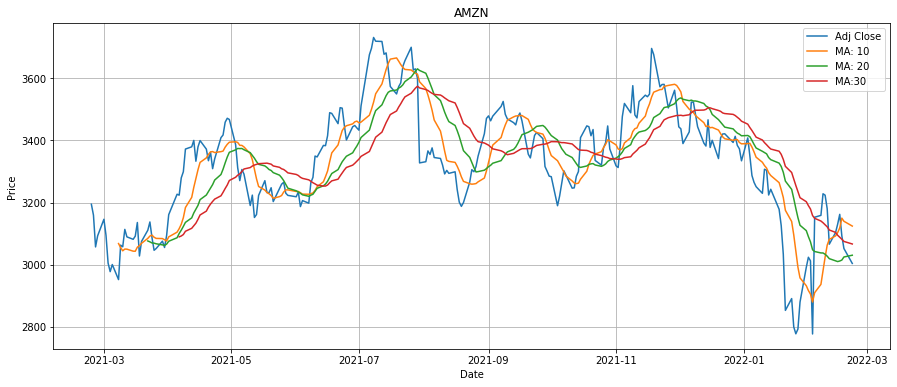

In [15]:
data_list = [TWTR, TSLA, MSFT, AMZN]

for i in range(len(data_list)):   
    plot_graphic(data_list[i], company_list[i])

If a long-term investment is being considered, then it is better to consider a smoother curve, since it is more resistant to sharp price jumps.

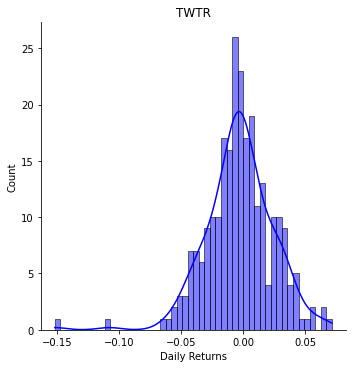

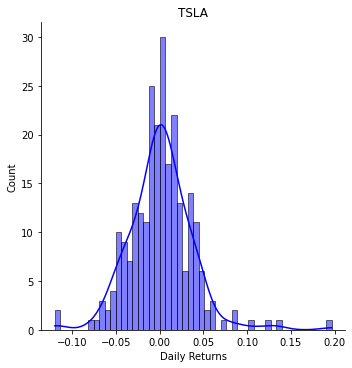

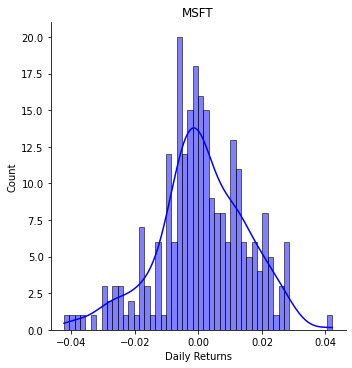

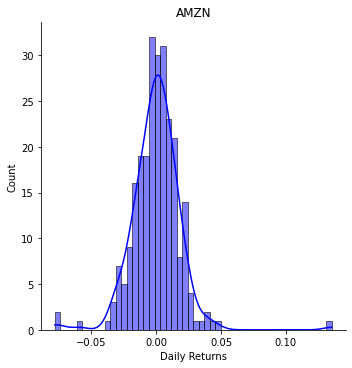

In [16]:
# Calculate returns and draw distribution

for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

## Correlation between stock returns

In [17]:
# Create dataframe with stock returns
stock_returns = pd.DataFrame(data=np.array([data['Daily Returns'] for data in data_list]).T, columns=company_list)
stock_returns.head()

,TWTR,TSLA,MSFT,AMZN
0,NaN,NaN,NaN,NaN
1,-0.017084,0.061788,0.005487,-0.010947
2,0.037125,-0.080591,-0.023705,-0.032400
3,0.033114,-0.009850,0.014804,0.011700
4,0.007397,0.063553,0.019623,0.017204


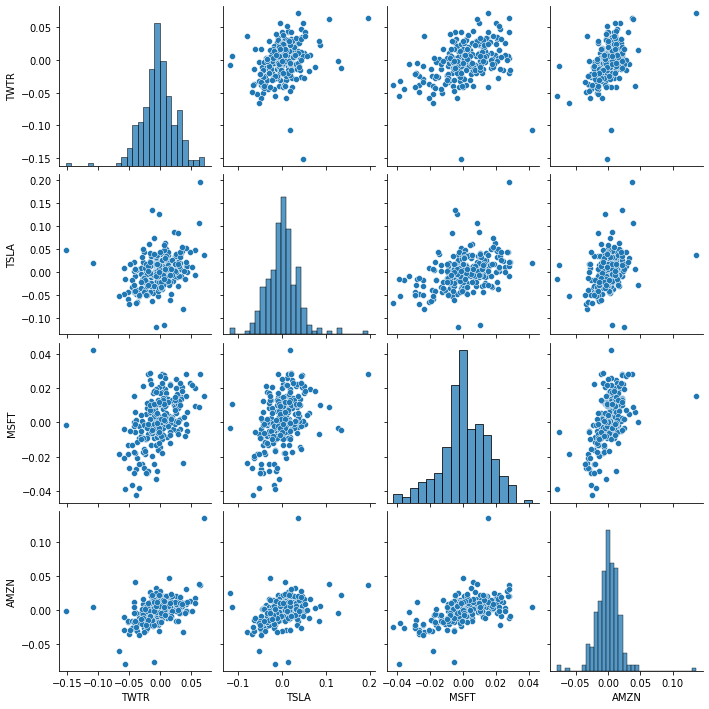

In [18]:
sns.pairplot(stock_returns.dropna())

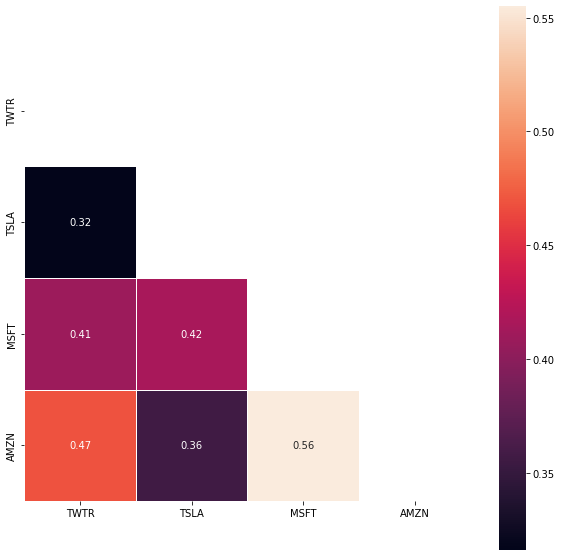

In [19]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [20]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

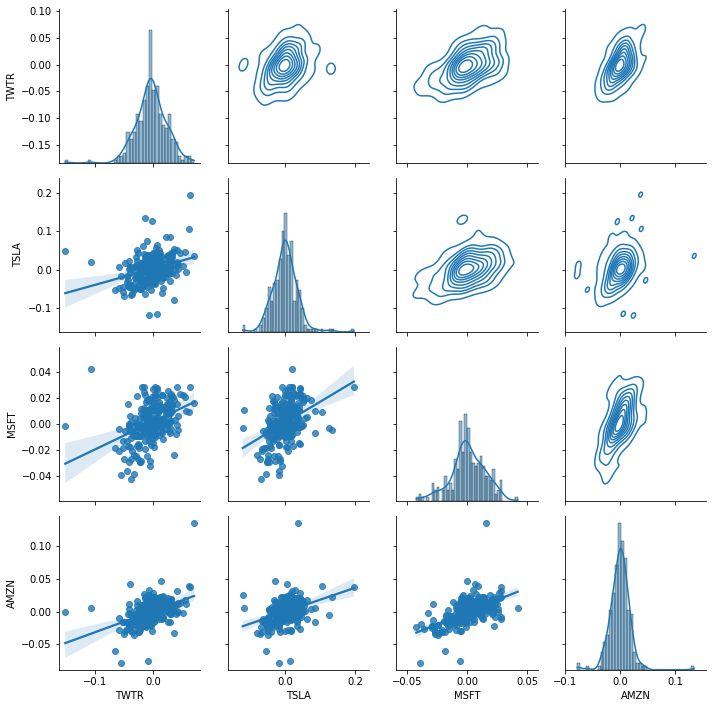

In [21]:
draw_jointplot(stock_returns)

From graphics we have see positive correlation, but it is within [0.24, 0.55]. Amazon and Microsoft have the most correlated daily profits. Tesla and Twitter have the lowest correlation. 

## Portfolio strategy

Let's try to make an optimal portfolio of four stocks. Following the classical theory, it is necessary to minimize risk and maximize profitability. We will generate random ratios of stocks, calculate the risk and profitability of each portfolio according to the given formulas.

The expected return of the portfolio is the total expected return of the securities included in it, weighted taking into account their share in the portfolio. 

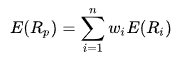

The basic formula for calculating risk is based on the relationship between the shares in the portfolio and the covariance associated with each of the securities in the portfolio.

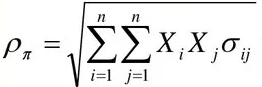

In [22]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

TWTR   -0.002790
TSLA    0.001285
MSFT    0.000963
AMZN   -0.000072
dtype: float64
          TWTR      TSLA      MSFT      AMZN
TWTR  0.000736  0.000310  0.000156  0.000237
TSLA  0.000310  0.001310  0.000211  0.000241
MSFT  0.000156  0.000211  0.000197  0.000145
AMZN  0.000237  0.000241  0.000145  0.000349


In [23]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [24]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [25]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

The Sharpe ratio is the ratio of return to risk.

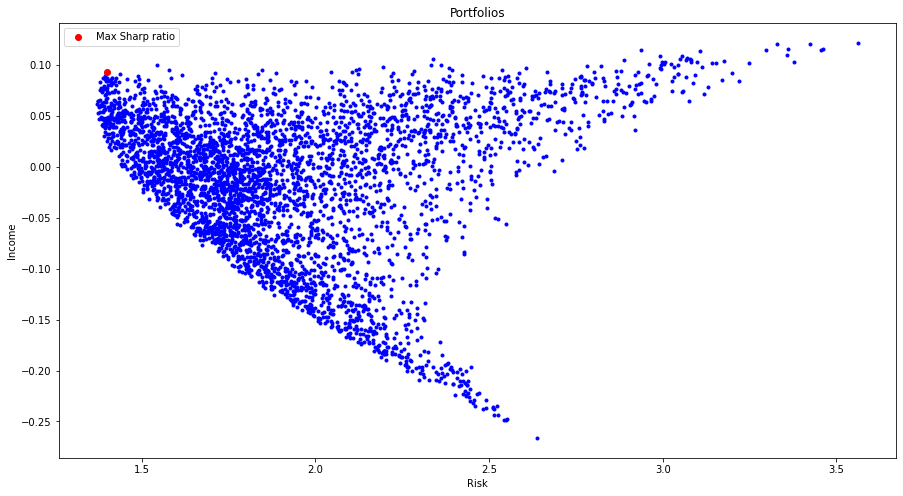

In [26]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [27]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

TWTR : 0.007851907972626438
TSLA : 0.020564771932339274
MSFT : 0.9573626032451896
AMZN : 0.014220716849844542


## Try to predict price behavior with method Monte Carlo

In [28]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [29]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

### Twitter

In [30]:
TWTR.tail()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2022-02-15,37.000000,36.060001,36.230000,36.980000,21350400,36.980000,36.337,36.0205,37.178000,0.036145
2022-02-16,36.279999,35.520000,35.970001,36.240002,17602400,36.240002,36.310,35.9650,37.024333,-0.020011
2022-02-17,36.610001,35.320000,35.990002,35.430000,16524400,35.430000,36.405,35.8725,36.888666,-0.022351
2022-02-18,35.660000,34.099998,35.490002,34.320000,15332900,34.320000,36.143,35.8475,36.713000,-0.031329
2022-02-22,33.930000,32.750000,33.660000,32.930000,16884800,32.930000,35.832,35.7410,36.488333,-0.040501


Text(0.5, 1.0, 'Monte Carlo analysis for Twitter')

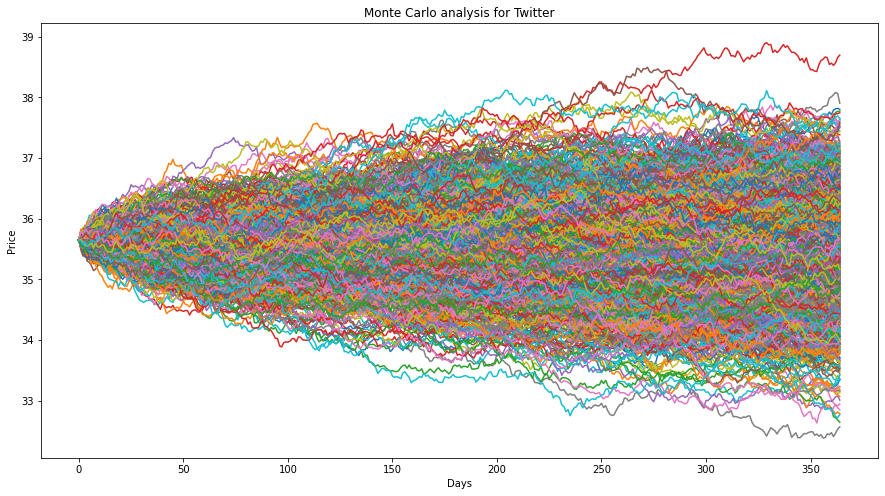

In [31]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TWTR'], sigma['TWTR'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Twitter')


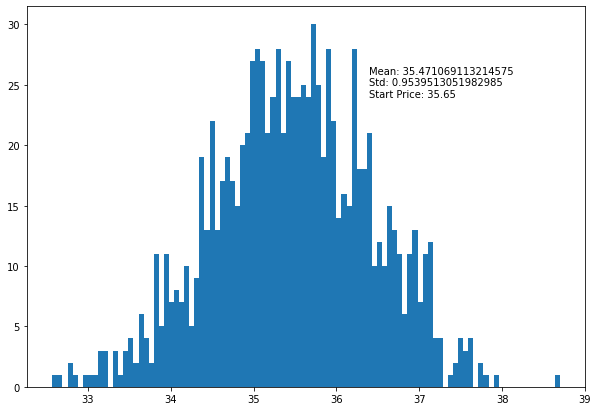

In [32]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Start price was 35.65, mean final price is 35.59. As we can see, final price is lower then start. Although the variance is small

### Tesla

In [33]:
TSLA.tail()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2022-02-15,923.000000,893.380005,900.000000,922.429993,19216500,922.429993,904.420001,915.462500,965.967997,0.053291
2022-02-16,926.429993,901.210022,914.049988,923.390015,17098100,923.390015,906.193005,911.849500,958.427999,0.001041
2022-02-17,918.500000,874.099976,913.260010,876.349976,18392800,876.349976,904.714001,905.853497,951.368998,-0.050943
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500,856.979980,898.079999,901.507495,944.444999,-0.022103
2022-02-22,856.729980,801.099976,834.130005,821.530029,27629800,821.530029,889.498999,896.083997,937.597335,-0.041366


Text(0.5, 1.0, 'Monte Carlo analysis for Tesla')

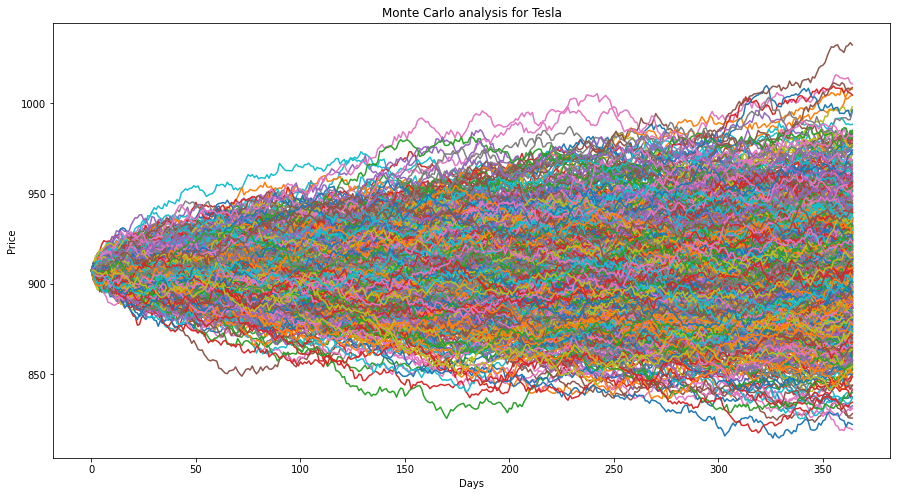

In [34]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TSLA'], sigma['TSLA'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Tesla')


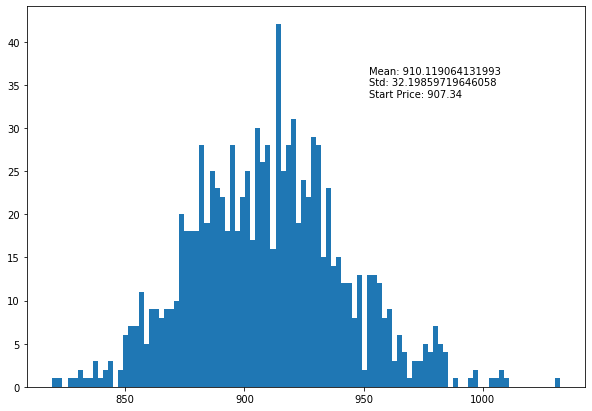

In [35]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

This time it turned out that the final price is more than the initial one. But the variance turned out to be very high. Stocks are considered risky.

### Microsoft

In [36]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2022-02-15,300.799988,297.019989,300.010010,300.470001,27379500.0,299.850006,302.400723,301.408273,305.338980,0.018542
2022-02-16,300.869995,293.679993,298.369995,299.500000,29982100.0,299.500000,301.069406,301.248070,304.377943,-0.001167
2022-02-17,296.799988,290.000000,296.359985,290.730011,32461600.0,290.730011,300.079568,300.735687,303.544704,-0.029282
2022-02-18,293.859985,286.309998,293.049988,287.929993,34223200.0,287.929993,298.341696,300.361229,302.701293,-0.009631
2022-02-22,291.540009,284.500000,285.000000,287.720001,41690400.0,287.720001,297.080795,299.959306,301.845560,-0.000729


Text(0.5, 1.0, 'Monte Carlo analysis for Microsoft')

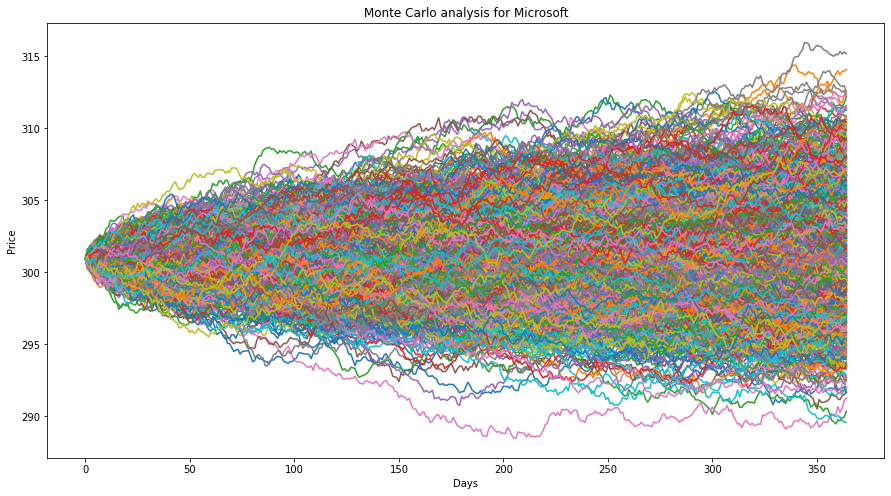

In [37]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsoft')

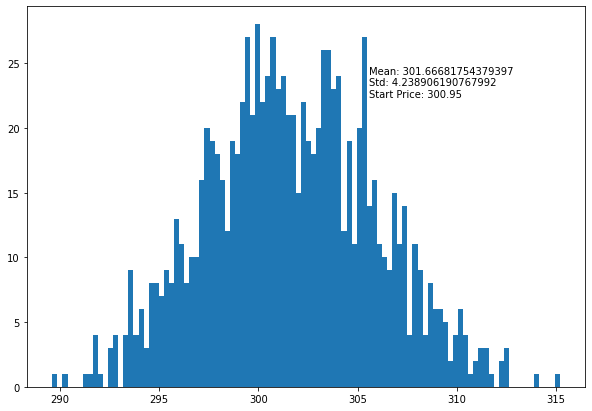

In [38]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

The stock looks stable. The final price is more than the initial one. The variance is relatively small

### Amazon

In [39]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2022-02-15,3160.139893,3092.750000,3152.110107,3130.209961,2848500,3130.209961,3103.221021,3010.005017,3094.677677,0.008658
2022-02-16,3176.679932,3094.689941,3115.810059,3162.010010,2635200,3162.010010,3118.197021,3011.806519,3088.396680,0.010159
2022-02-17,3206.979980,3090.000000,3162.919922,3093.050049,3201600,3093.050049,3149.811035,3014.791516,3081.927018,-0.021809
2022-02-18,3109.989990,3017.860107,3109.989990,3052.030029,3168200,3052.030029,3139.735034,3024.750012,3074.825350,-0.013262
2022-02-22,3059.649902,2969.709961,3009.570068,3003.949951,3294300,3003.949951,3124.259033,3030.403516,3066.587679,-0.015753


Text(0.5, 1.0, 'Monte Carlo analysis for Amazon')

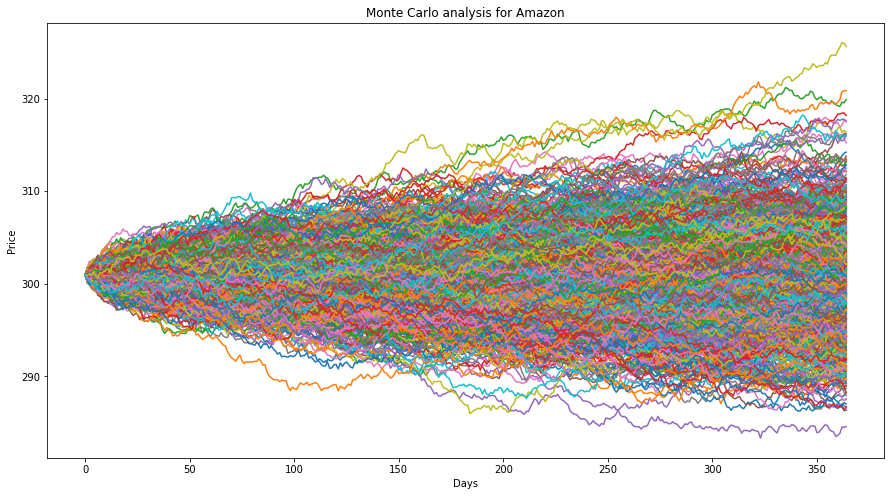

In [40]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AMZN'], sigma['AMZN'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Amazon')

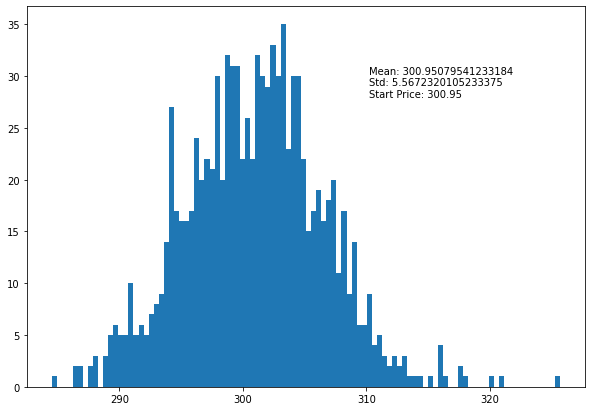

In [41]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

The initial and final price are almost the same. The variance is normal. Stocks look stable.